In [59]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [60]:
df = pd.read_csv('2015_station_days_with_meta.csv', usecols=range(1,20))
df = df.ix[df['Partition'] == 'Weekdays']

In [61]:
df.head()

,Station,Time,Flow,Speed,Occu,Partition,Fwy,Dir,ID,District,County,City,State_PM,Abs_PM,Latitude,Longitude,Name,Lanes,Type
0,1108299,00:00:00,23.770115,66.016858,0.007269,Weekdays,125,N,1108299,11,73,40004.0,R15.269,17.020,32.775560,-117.002934,At Grossmont Blvd,3,ML
1,1108372,00:00:00,59.704981,67.326054,0.017446,Weekdays,125,N,1108372,11,73,NaN,13.614,15.373,32.754424,-117.010210,CAMPO RD,3,ML
2,1111555,00:00:00,23.716475,65.368199,0.006160,Weekdays,125,N,1111555,11,73,40004.0,18.63,17.881,32.787663,-117.006295,AMAYA DR,3,ML
3,1111557,00:00:00,28.586207,66.914943,0.006476,Weekdays,125,N,1111557,11,73,40004.0,19.089,18.340,32.794264,-117.005630,LAKE ANGELA DR,4,ML
4,1112964,00:00:00,37.103448,68.064368,0.011172,Weekdays,125,N,1112964,11,73,NaN,9.81,11.569,32.702928,-117.010755,ELKELTON PL,3,ML


In [62]:
wiggle_dict = {}
for i in range(30):
    key = "Peak{}".format(('0'+str(i))[-2:])
    values = [np.cos(period/(2*np.pi)*(t-i/5.0)) for t in range(T)]
    wiggle_dict[key] = values

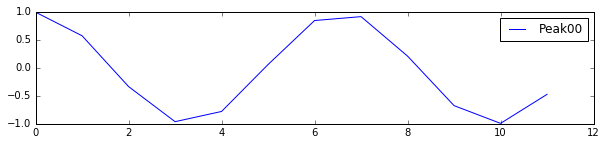

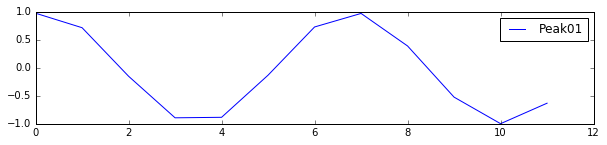

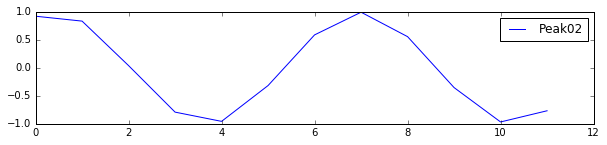

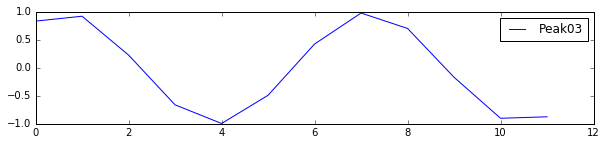

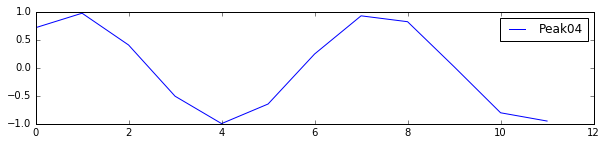

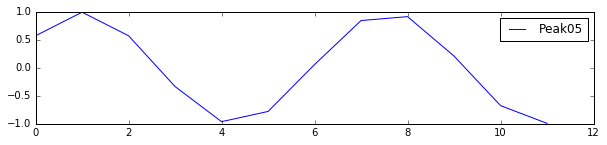

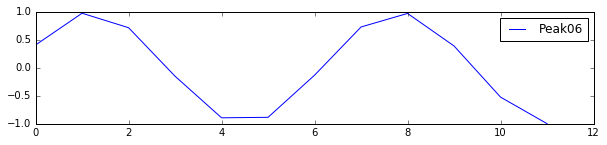

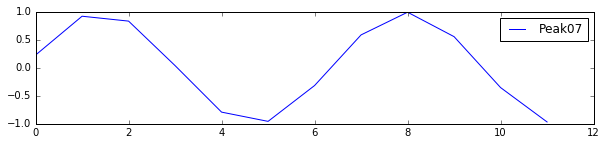

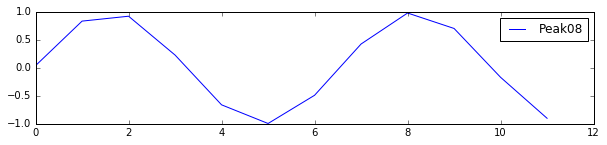

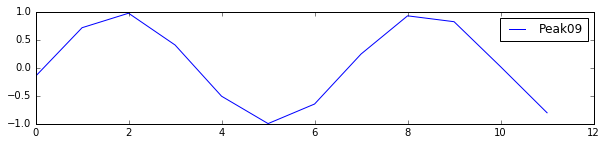

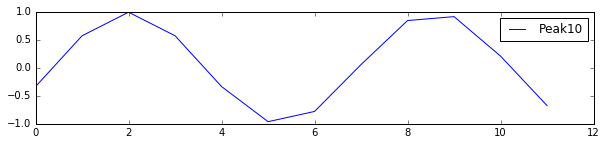

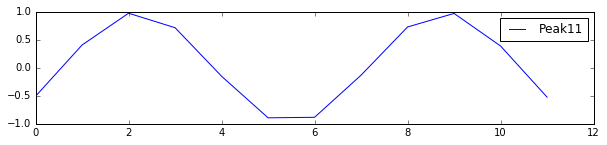

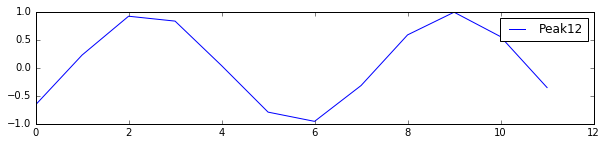

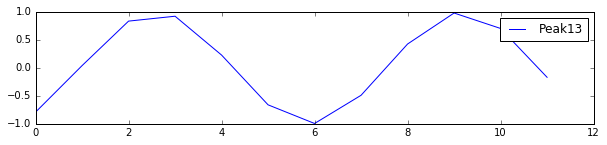

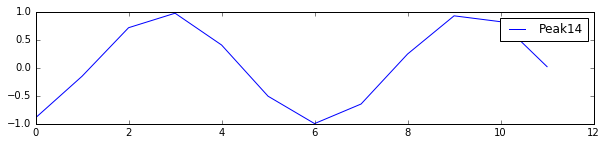

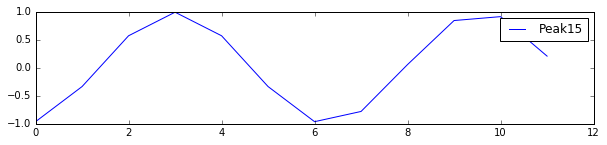

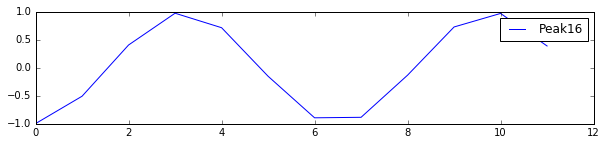

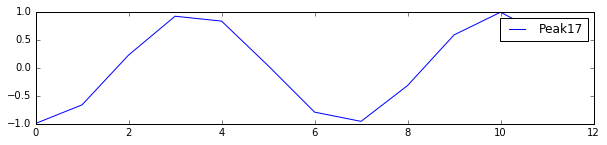

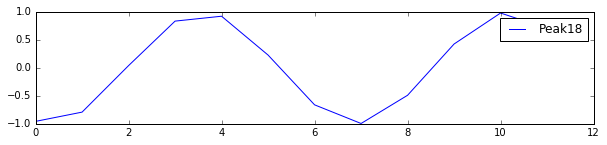

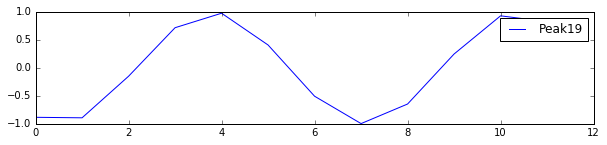

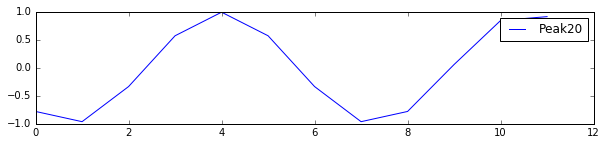

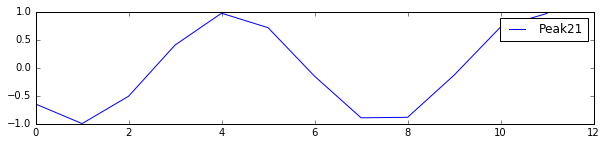

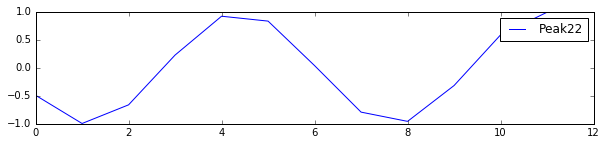

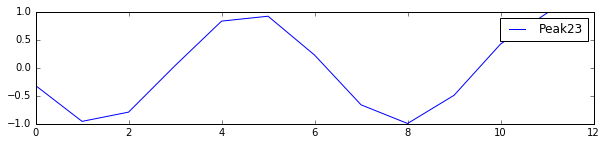

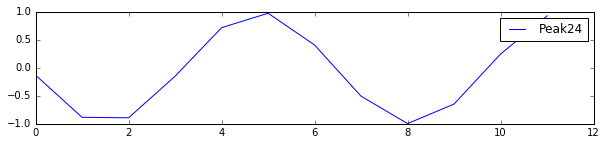

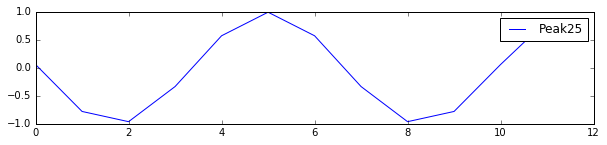

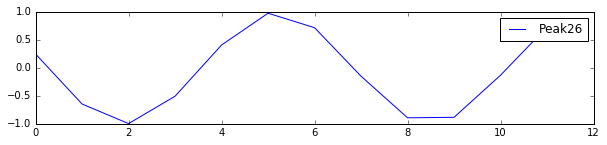

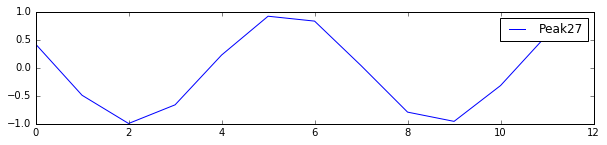

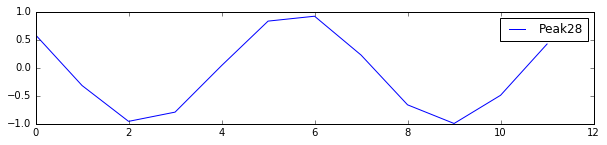

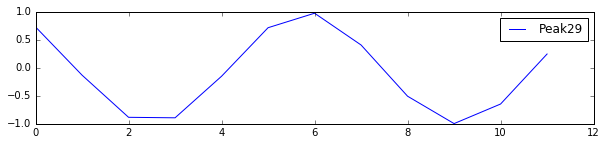

In [63]:
for key in sorted(wiggle_dict.keys()):
    plt.figure(figsize = (10,2))
    plt.plot(wiggle_dict[key][:12], label = key)
    plt.legend()
    plt.show()

In [64]:
flow_df = df.pivot(index='Station', columns='Time', values='Flow')

In [81]:
flow_df.index

Int64Index([1108148, 1108285, 1108287, 1108289, 1108291, 1108293, 1108295,
            1108297, 1108299, 1108302,
            ...
            1126006, 1126016, 1126022, 1126027, 1126035, 1126148, 1126156,
            1126163, 1126175, 1126191],
           dtype='int64', name=u'Station', length=839)

In [79]:
max_indexes = []
for i, vector in enumerate(flow_df.values):
    list_of_coefs = []
    for key in sorted(wiggle_dict.keys()):
        list_of_coefs.append(np.dot(wiggle_dict[key],vector))
        
    max_coef_index = list_of_coefs.index(max(list_of_coefs))
    max_indexes.append(max_coef_index)

In [88]:
max_times_df = pd.DataFrame({'ID':flow_df.index , 'MaxTime':max_indexes})

In [89]:
max_times_df

,ID,MaxTime
0,1108148,13
1,1108285,18
2,1108287,18
3,1108289,18
4,1108291,17
5,1108293,17
6,1108295,16
7,1108297,14
8,1108299,12
9,1108302,14


In [90]:
meta = pd.read_csv('d11_text_meta_2015_12_17.txt', sep='\t')

In [94]:
meta.merge(max_times_df).to_csv('wiggle_by_min_flow_output.csv')